In [2]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xesmf as xe
import cartopy.crs as ccrs

In [3]:
ds = xr.open_dataset('../data/adaptor.mars.internal-1707911246.890499-7326-1-fb861f93-6d01-444a-8d0b-e741cfe36eea.nc')
ds

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 144)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2015-12-01
Data variables:
    skt        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-02-14 11:47:29 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [8]:
dr = ds['skt']

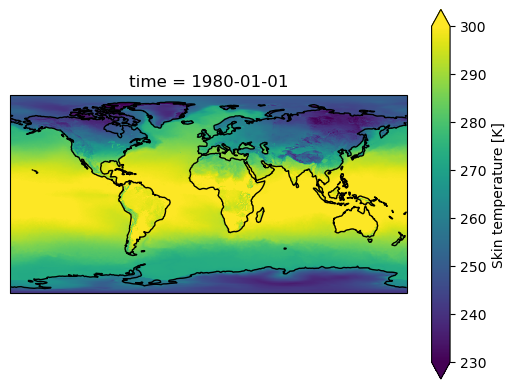

In [10]:
ax = plt.axes(projection=ccrs.PlateCarree())
dr.isel(time=0).plot.pcolormesh(ax=ax, vmin=230, vmax=300)
ax.coastlines()

## INPUT GRID

In [17]:
ds["latitude"].values

array([ 90.  ,  89.75,  89.5 ,  89.25,  89.  ,  88.75,  88.5 ,  88.25,
        88.  ,  87.75,  87.5 ,  87.25,  87.  ,  86.75,  86.5 ,  86.25,
        86.  ,  85.75,  85.5 ,  85.25,  85.  ,  84.75,  84.5 ,  84.25,
        84.  ,  83.75,  83.5 ,  83.25,  83.  ,  82.75,  82.5 ,  82.25,
        82.  ,  81.75,  81.5 ,  81.25,  81.  ,  80.75,  80.5 ,  80.25,
        80.  ,  79.75,  79.5 ,  79.25,  79.  ,  78.75,  78.5 ,  78.25,
        78.  ,  77.75,  77.5 ,  77.25,  77.  ,  76.75,  76.5 ,  76.25,
        76.  ,  75.75,  75.5 ,  75.25,  75.  ,  74.75,  74.5 ,  74.25,
        74.  ,  73.75,  73.5 ,  73.25,  73.  ,  72.75,  72.5 ,  72.25,
        72.  ,  71.75,  71.5 ,  71.25,  71.  ,  70.75,  70.5 ,  70.25,
        70.  ,  69.75,  69.5 ,  69.25,  69.  ,  68.75,  68.5 ,  68.25,
        68.  ,  67.75,  67.5 ,  67.25,  67.  ,  66.75,  66.5 ,  66.25,
        66.  ,  65.75,  65.5 ,  65.25,  65.  ,  64.75,  64.5 ,  64.25,
        64.  ,  63.75,  63.5 ,  63.25,  63.  ,  62.75,  62.5 ,  62.25,
      

In [18]:
ds["longitude"].values

array([0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.5925e+02, 3.5950e+02,
       3.5975e+02], dtype=float32)

Resolución de 0.25º x 0.25º

## OUTPUT GRID

Resolución 0.5º x 0.5º

In [23]:
ds_out = xr.Dataset({'latitude': (['latitude'], np.arange(-90, 90.5, 0.5)),
                     'longitude': (['longitude'], np.arange(0, 360.5, 0.5)),
                    }
                   )
ds_out

<xarray.Dataset>
Dimensions:    (latitude: 361, longitude: 721)
Coordinates:
  * latitude   (latitude) float64 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * longitude  (longitude) float64 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5 360.0
Data variables:
    *empty*

# REGRIDDING

In [24]:
regridder = xe.Regridder(ds, ds_out, "conservative")
regridder  

/home/alonsor/miniconda3/envs/temporal-downscaling/lib/python3.12/site-packages/xesmf/backend.py:56: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')
/home/alonsor/miniconda3/envs/temporal-downscaling/lib/python3.12/site-packages/xesmf/backend.py:56: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')


xESMF Regridder 
Regridding algorithm:       conservative 
Weight filename:            conservative_721x1440_361x721.nc 
Reuse pre-computed weights? False 
Input grid shape:           (721, 1440) 
Output grid shape:          (361, 721) 
Periodic in longitude?      False

In [25]:
dr_out = regridder(dr, keep_attrs=True)
dr_out

<xarray.DataArray 'skt' (time: 144, latitude: 361, longitude: 721)>
array([[[ 60.624207,  60.624466,  60.625134, ...,  60.623825,
          60.623928,  60.624035],
        [242.76904 , 242.77023 , 242.7714  , ..., 242.76884 ,
         242.76884 , 242.76904 ],
        [242.94394 , 242.94063 , 242.9377  , ..., 242.95432 ,
         242.94861 , 242.94394 ],
        ...,
        [252.09267 , 252.06638 , 252.03992 , ..., 252.14421 ,
         252.1186  , 252.09267 ],
        [251.78352 , 251.77055 , 251.7584  , ..., 251.81396 ,
         251.7979  , 251.78352 ],
        [ 62.72701 ,  62.725674,  62.724545, ...,  62.730934,
          62.7288  ,  62.72694 ]],

       [[ 58.296223,  58.296707,  58.297348, ...,  58.29508 ,
          58.29544 ,  58.29612 ],
        [233.31898 , 233.32397 , 233.32858 , ..., 233.31453 ,
         233.31635 , 233.31898 ],
        [233.36577 , 233.36705 , 233.36722 , ..., 233.37082 ,
         233.36823 , 233.36577 ],
...
        [252.8498  , 252.85611 , 252.86339 , ..., 252.8482  ,
         252.84871 , 252.8498  ],
        [253.07338 , 253.07709 , 253.0824  , ..., 253.07057 ,
         253.07205 , 253.07338 ],
        [ 63.31034 ,  63.31066 ,  63.31113 , ...,  63.310272,
          63.310238,  63.31043 ]],

       [[ 60.90069 ,  60.900265,  60.899986, ...,  60.901245,
          60.900883,  60.900394],
        [243.71216 , 243.70663 , 243.70152 , ..., 243.72217 ,
         243.7172  , 243.71216 ],
        [243.856   , 243.84546 , 243.83434 , ..., 243.88028 ,
         243.86795 , 243.856   ],
        ...,
        [245.38635 , 245.3903  , 245.39482 , ..., 245.3797  ,
         245.38245 , 245.38635 ],
        [245.37563 , 245.3774  , 245.37907 , ..., 245.37297 ,
         245.37444 , 245.37563 ],
        [ 61.33708 ,  61.33708 ,  61.33731 , ...,  61.336895,
          61.33713 ,  61.33713 ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2015-12-01
  * latitude   (latitude) float64 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * longitude  (longitude) float64 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5 360.0
Attributes:
    units:          K
    long_name:      Skin temperature
    regrid_method:  conservative

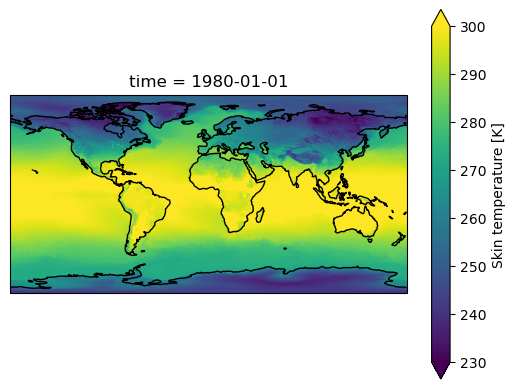

In [26]:
ax = plt.axes(projection=ccrs.PlateCarree())
dr_out.isel(time=0).plot.pcolormesh(ax=ax, vmin=230, vmax=300)
ax.coastlines()